In [1]:
from rdkit import Chem
import pyaniasetools as pya
import pyanitools as pyt

from ase_interface import ANIENS,ensemblemolecule
import hdnntools as hdt
import numpy as np

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os

van Der Waals correction will be unavailable. Please install ased3


In [2]:
fdir = '/home/jsmith48/scratch/ccsd_extrapolation/torsional_files/'
h5dir = '/home/jsmith48/scratch/ccsd_extrapolation/torsional_files/DFT_CALC/'
basename = 'ANI-1ccx_2'
goldstan = 'CCSD_T_CBS_MP2-'

In [3]:
anix_files = sorted([f for f in os.listdir(fdir) if basename in f])
comp_files = sorted([f for f in os.listdir(fdir) if basename not in f and goldstan not in f and ".sdf" in f])

In [4]:
comp_files

['ANI-1ccx-R-01.sdf',
 'ANI-1ccx-R-02.sdf',
 'ANI-1ccx-R-03.sdf',
 'ANI-1ccx-R-04.sdf',
 'ANI-1ccx-R-05.sdf',
 'ANI-1ccx-R-06.sdf',
 'ANI-1ccx-R-11.sdf',
 'ANI-1ccx-R-12.sdf',
 'ANI-1ccx-R-13.sdf',
 'ANI-1ccx-R-14.sdf',
 'ANI-1ccx-R-15.sdf',
 'ANI-1ccx-R-17.sdf',
 'ANI-1ccx-R-18.sdf',
 'ANI-1ccx-R-19.sdf',
 'ANI-1ccx-R-20.sdf',
 'ANI-1ccx-R-21.sdf',
 'ANI-1ccx-R-22.sdf',
 'ANI-1ccx-R-23.sdf',
 'ANI-1ccx-R-25.sdf',
 'ANI-1ccx-R-26.sdf',
 'ANI-1ccx-R-27.sdf',
 'ANI-1ccx-R-31.sdf',
 'ANI-1ccx-R-32.sdf',
 'ANI-1ccx-R-33.sdf',
 'ANI-1ccx-R-34.sdf',
 'ANI-1ccx-R-35.sdf',
 'ANI-1ccx-R-36.sdf',
 'ANI-1ccx-R-37.sdf',
 'ANI-1ccx-R-39.sdf',
 'ANI-1ccx-R-40.sdf',
 'ANI-1ccx-R-41.sdf',
 'ANI-1ccx-R-43.sdf',
 'ANI-1ccx-R-44.sdf',
 'ANI-1ccx-R-45.sdf',
 'ANI-1ccx-R-46.sdf',
 'ANI-1ccx-R-49.sdf',
 'ANI-1ccx-R-50.sdf',
 'ANI-1ccx-R-53.sdf',
 'ANI-1ccx-R-54.sdf',
 'ANI-1ccx-R-57.sdf',
 'ANI-1ccx-R-58.sdf',
 'ANI-1ccx-R-59.sdf',
 'ANI-1ccx-R-60.sdf',
 'ANI-1ccx-R-61.sdf',
 'ANI-1ccx-R-62.sdf',
 'ANI-1x-0

In [5]:
MAE = dict()
Est = dict()
for i,f in enumerate(anix_files):
    midx = f.rsplit('-',1)[1].rsplit('.',1)[0]
    cfiles = [f for f in comp_files if midx in f.rsplit('-',1)[1]]
    cfiles.append(f)
    print(i,midx,len(cfiles))
    
    suppl_t = Chem.SDMolSupplier(fdir+goldstan+midx+'.sdf', removeHs=False)
    stdic = dict()
    for st in suppl_t:
        std = st.GetPropsAsDict()
        stdic[std['ScanVar_1']] = float(std['deltaE'])
        
    for cf in cfiles:
        suppl_c = Chem.SDMolSupplier(fdir+cf, removeHs=False)
        
        
        key = cf.rsplit('-',1)[0]
    
        E = []
        V = []
        #print(cf,key)
        for sc in suppl_c:
            scd = sc.GetPropsAsDict()
            
            Ecd = float(scd['deltaE'])
            
            #print(cf,scd['ScanVar_1'])
            
            E.append(np.array([stdic[scd['ScanVar_1']],Ecd,float(scd['ScanVar_1'])]))
            
        E = np.stack(E)
        
        if midx not in Est:
            Est[midx] = dict({key:E})
        else:
            Est[midx].update({key:E})
        #fig = plt.figure(figsize=(12, 10),dpi=200)
        #plt.plot(E[:,0],label='Opt')
        #plt.plot(E[:,1],label='No Opt')
        #plt.plot(Ecd,label='CCSD')
        #plt.legend()
        #plt.show()
        
        mae = hdt.calculatemeanabserror(E[:,0],E[:,1])
        #print(mae)
    
        if key in MAE:
            MAE[key].append(mae)
        else:
            MAE[key] = [mae]
        
    

0 01 12
1 02 12
2 03 12
3 04 12
4 05 12
5 06 12
6 11 12
7 12 12
8 13 12
9 14 12
10 15 12
11 17 12
12 18 12
13 19 12
14 20 12
15 21 12
16 22 12
17 23 12
18 25 12
19 26 12
20 27 12
21 31 12
22 32 12
23 33 12
24 34 12
25 35 12
26 36 12
27 37 12
28 39 12
29 40 12
30 41 12
31 43 12
32 44 12
33 45 12
34 46 12
35 49 12
36 50 12
37 53 12
38 54 12
39 57 12
40 58 12
41 59 12
42 60 12
43 61 12
44 62 12


01 ANI-1ccx_2 0.257681547127074
01 ANI-1x 0.0931218256889447
01 WB97X-631Gd 0.06379608387732422
01 MacroModel_OPLS3 0.28134012714437706


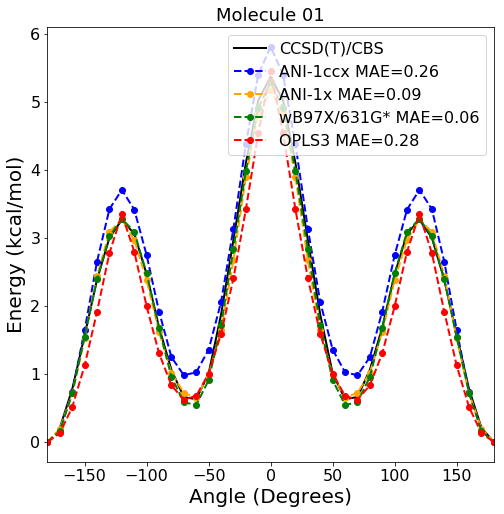

02 ANI-1ccx_2 0.17311201757149705
02 ANI-1x 0.17296065162088967
02 WB97X-631Gd 0.046870250053886175
02 MacroModel_OPLS3 0.11135843489674636


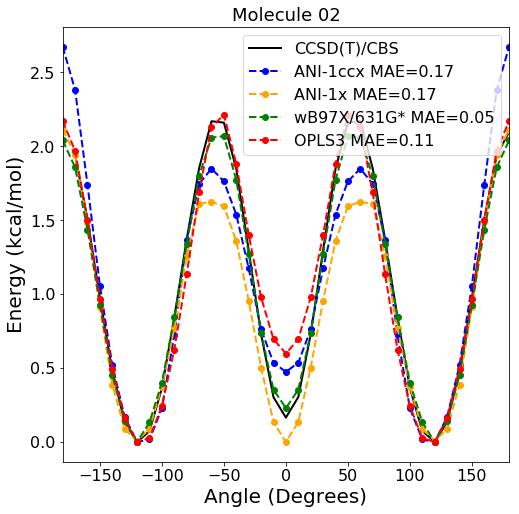

03 ANI-1ccx_2 0.23148940470069176
03 ANI-1x 0.2699913650617503
03 WB97X-631Gd 0.05934054020380777
03 MacroModel_OPLS3 0.14453008708222365


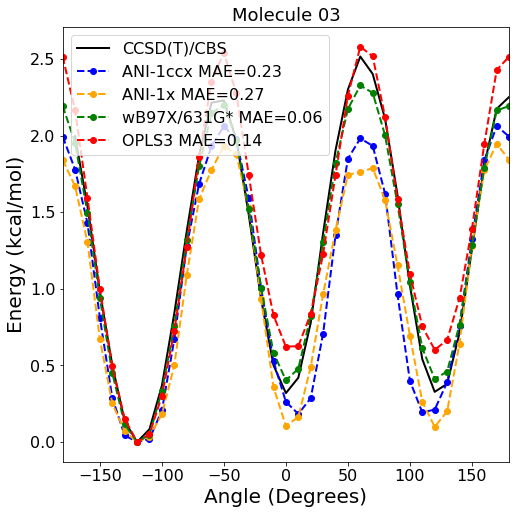

04 ANI-1ccx_2 0.38161507672799094
04 ANI-1x 0.32461015955958117
04 WB97X-631Gd 0.10931863517323254
04 MacroModel_OPLS3 0.10044858999133276


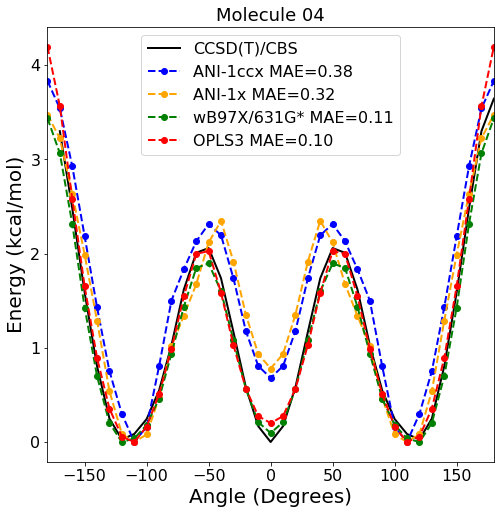

05 ANI-1ccx_2 0.3510820904528093
05 ANI-1x 0.8640182932664258
05 WB97X-631Gd 0.7378312893330575
05 MacroModel_OPLS3 0.9282235530495638


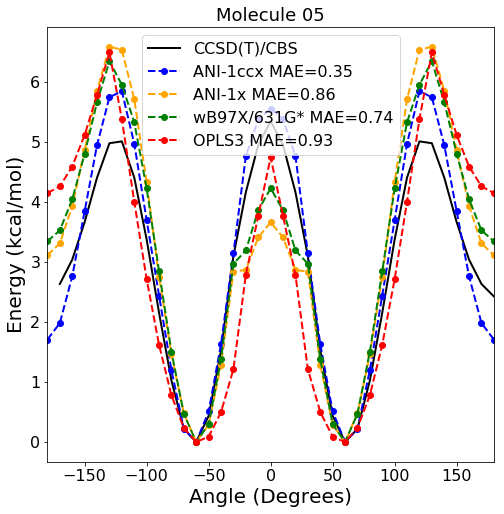

06 ANI-1ccx_2 0.1387075753392139
06 ANI-1x 0.5965569842751035
06 WB97X-631Gd 0.36093696302323797
06 MacroModel_OPLS3 0.4670874875824429


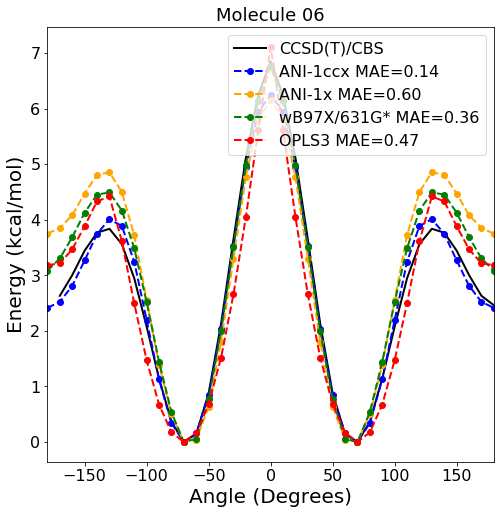

11 ANI-1ccx_2 0.4296100674483834
11 ANI-1x 0.5895411456903912
11 WB97X-631Gd 0.2845438085639633
11 MacroModel_OPLS3 1.098540577170673


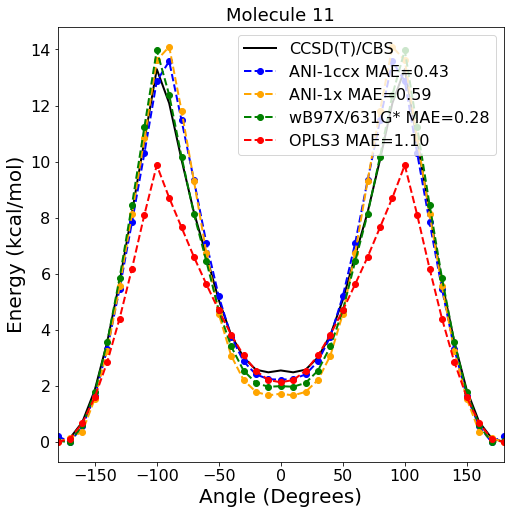

12 ANI-1ccx_2 0.3389645282542984
12 ANI-1x 0.2827183403228955
12 WB97X-631Gd 0.3009662662457011
12 MacroModel_OPLS3 1.0367156299641165


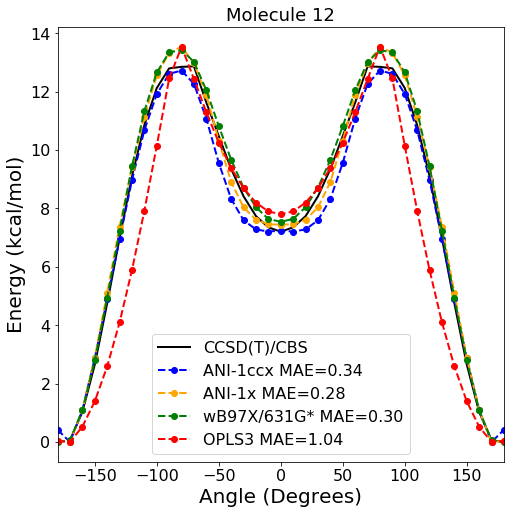

13 ANI-1ccx_2 0.23166545050540735
13 ANI-1x 0.3137762359744738
13 WB97X-631Gd 0.22711605439865362
13 MacroModel_OPLS3 0.6019061810340007


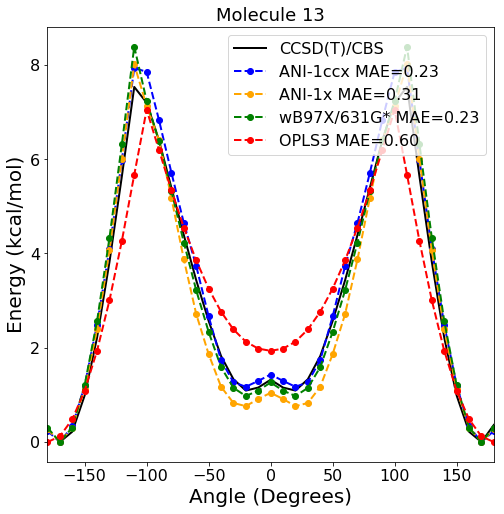

14 ANI-1ccx_2 0.09881412414925765
14 ANI-1x 0.176852055591874
14 WB97X-631Gd 0.13206098624819698
14 MacroModel_OPLS3 0.24137098593895917


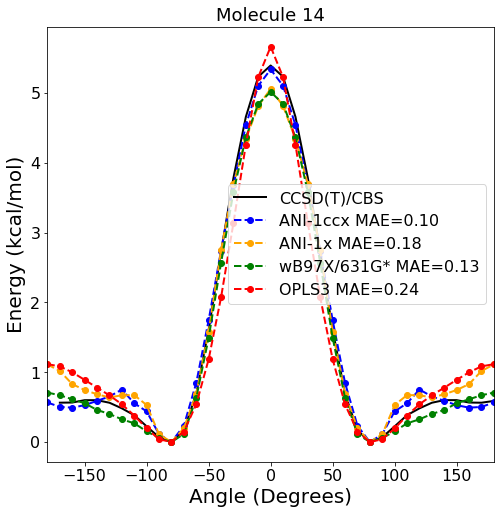

15 ANI-1ccx_2 0.1626776275980779
15 ANI-1x 0.3766331679833069
15 WB97X-631Gd 0.0840049628118908
15 MacroModel_OPLS3 0.36318298939354504


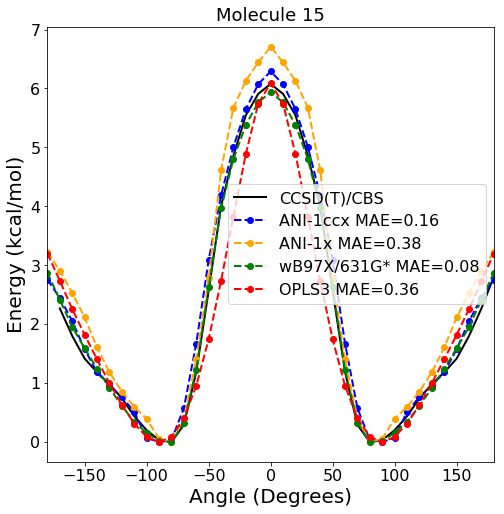

17 ANI-1ccx_2 0.18458906986704113
17 ANI-1x 0.04291485676909714
17 WB97X-631Gd 0.12118263506553502
17 MacroModel_OPLS3 0.2998159447351353


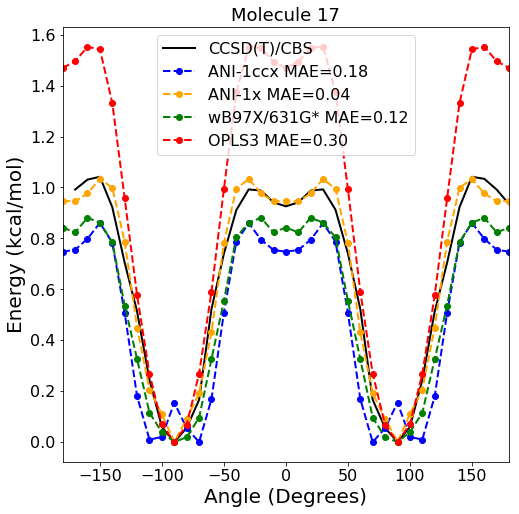

18 ANI-1ccx_2 0.36900397496251197
18 ANI-1x 0.7145005402604538
18 WB97X-631Gd 0.1682009415946951
18 MacroModel_OPLS3 0.37472641721350025


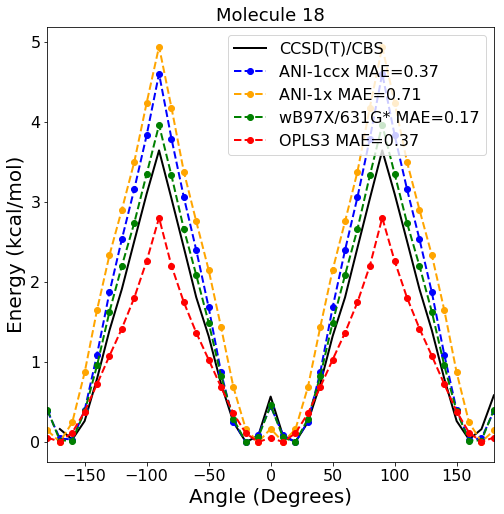

19 ANI-1ccx_2 0.10423628946439954
19 ANI-1x 0.058960753835949196
19 WB97X-631Gd 0.05835310554888176
19 MacroModel_OPLS3 0.5796991155852647


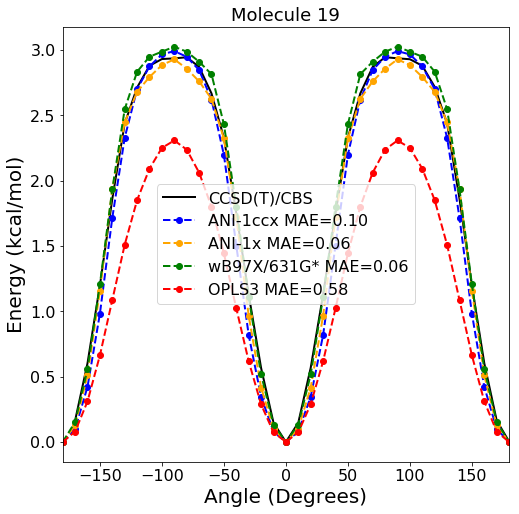

20 ANI-1ccx_2 0.5182368275642895
20 ANI-1x 0.4679036681616263
20 WB97X-631Gd 0.21724539415363703
20 MacroModel_OPLS3 0.5535469893059196


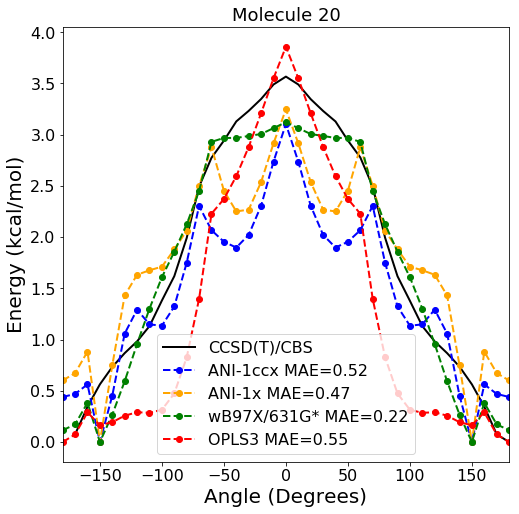

21 ANI-1ccx_2 0.3582576515044569
21 ANI-1x 1.1196866418845761
21 WB97X-631Gd 1.018022280173469
21 MacroModel_OPLS3 1.5990380691561947


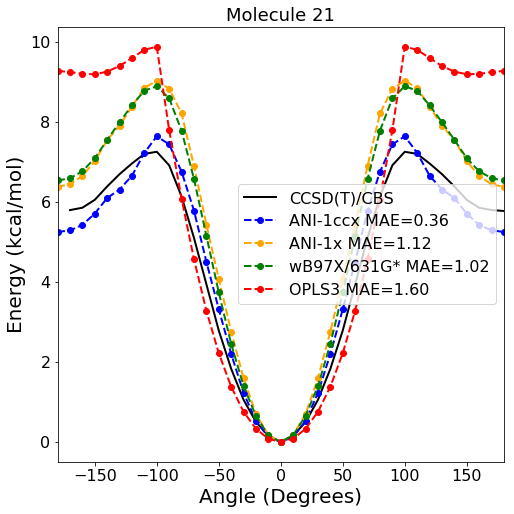

22 ANI-1ccx_2 0.34909274252041333
22 ANI-1x 1.1432526144467958
22 WB97X-631Gd 0.4943388764907892
22 MacroModel_OPLS3 1.4421196318308527


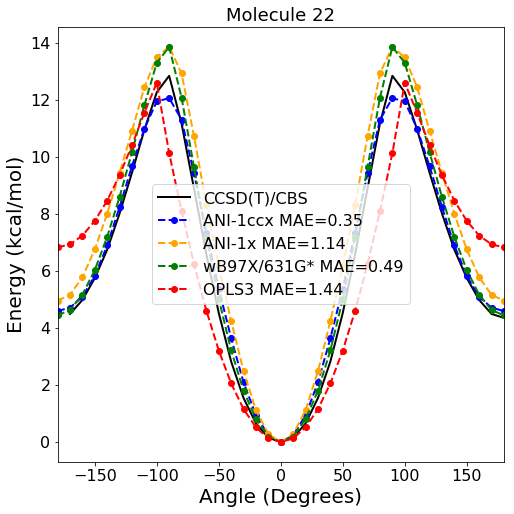

23 ANI-1ccx_2 0.23163895752318778
23 ANI-1x 0.9910191987388125
23 WB97X-631Gd 0.750011136232952
23 MacroModel_OPLS3 0.5305136627016473


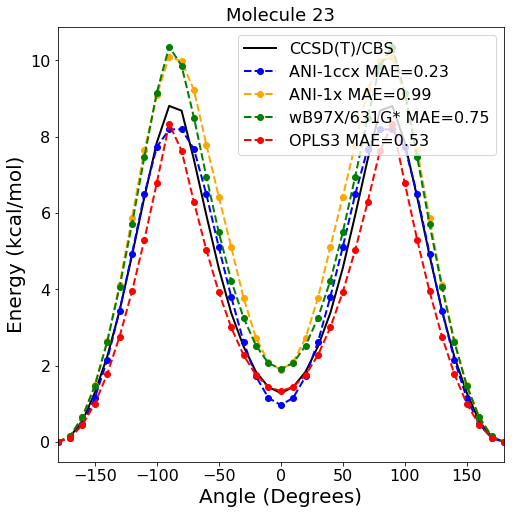

25 ANI-1ccx_2 0.43656674097057774
25 ANI-1x 1.109004957617679
25 WB97X-631Gd 0.7198984525854785
25 MacroModel_OPLS3 1.6822437130681103


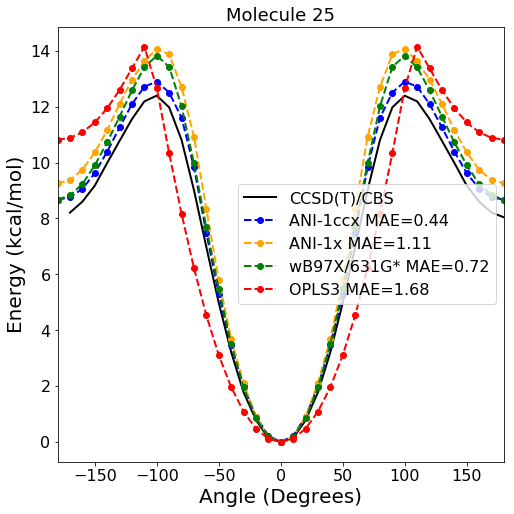

26 ANI-1ccx_2 0.2925195597620067
26 ANI-1x 1.0121409760878746
26 WB97X-631Gd 0.9541982581091885
26 MacroModel_OPLS3 0.7825224420254115


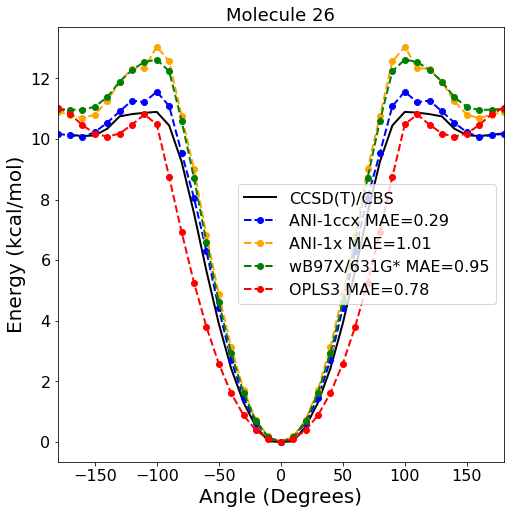

27 ANI-1ccx_2 0.22737071376268686
27 ANI-1x 0.5932662367881929
27 WB97X-631Gd 0.49518789452034745
27 MacroModel_OPLS3 0.6326418242958608


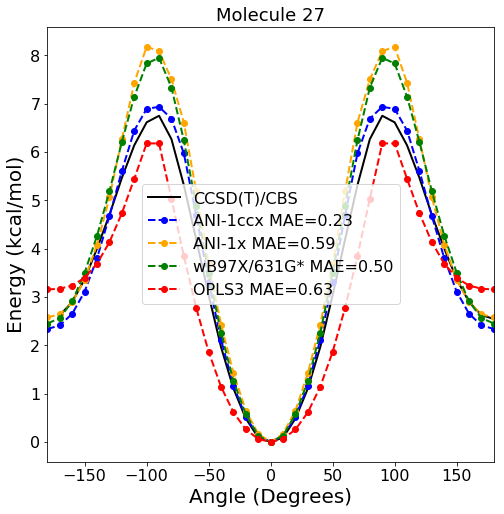

31 ANI-1ccx_2 0.14803010171924277
31 ANI-1x 0.3388252220496091
31 WB97X-631Gd 0.37801218406914333
31 MacroModel_OPLS3 0.21986968606441176


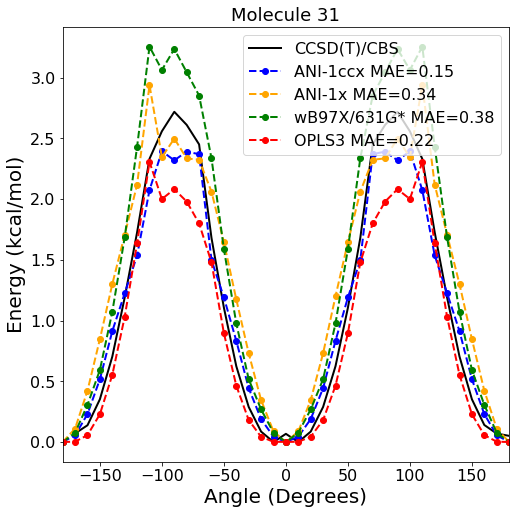

32 ANI-1ccx_2 0.1625125285676515
32 ANI-1x 0.2905807878804702
32 WB97X-631Gd 0.28518584081582193
32 MacroModel_OPLS3 0.2802346201474522


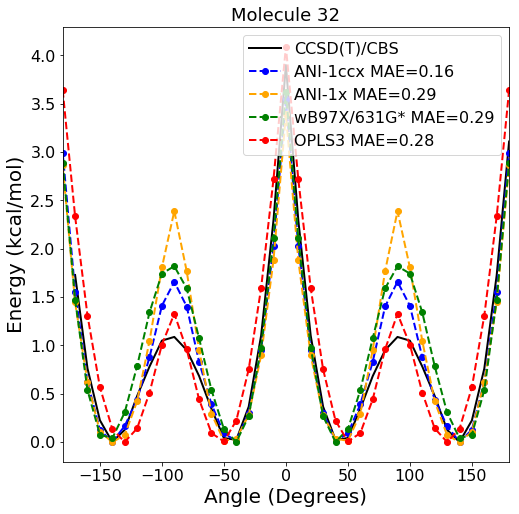

33 ANI-1ccx_2 0.45791370079814697
33 ANI-1x 0.7752223392091003
33 WB97X-631Gd 0.5512616255868615
33 MacroModel_OPLS3 0.6378305960688042


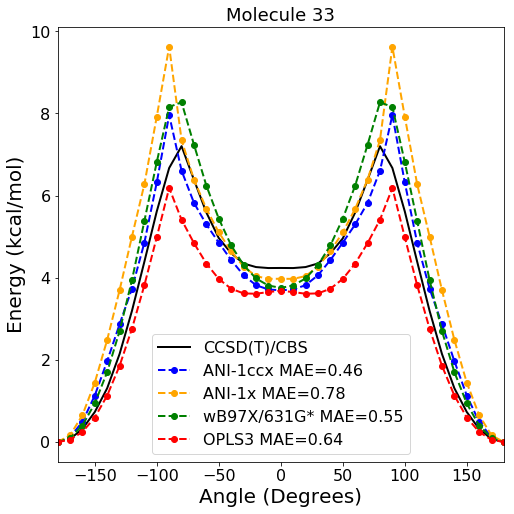

34 ANI-1ccx_2 0.4041110480578951
34 ANI-1x 0.11971793766819568
34 WB97X-631Gd 0.7834261814244903
34 MacroModel_OPLS3 0.7141071985755096


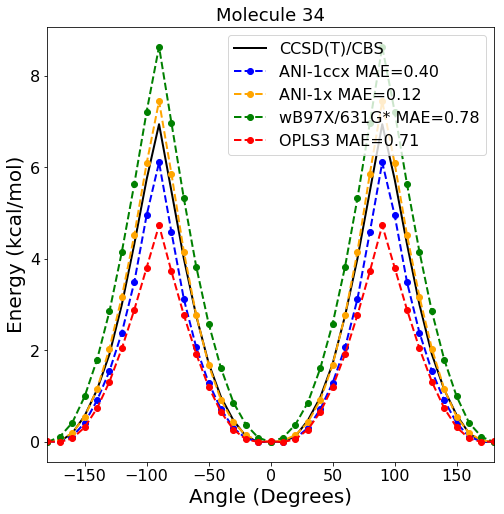

35 ANI-1ccx_2 0.3482334078976972
35 ANI-1x 1.0441056306915837
35 WB97X-631Gd 0.7264070369724124
35 MacroModel_OPLS3 1.3181689975583475


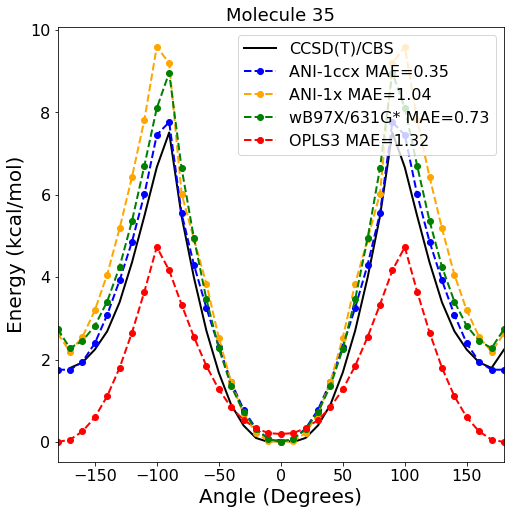

36 ANI-1ccx_2 0.5713527065173648
36 ANI-1x 0.3949370569908762
36 WB97X-631Gd 0.27005027375386437
36 MacroModel_OPLS3 2.8817760247512885


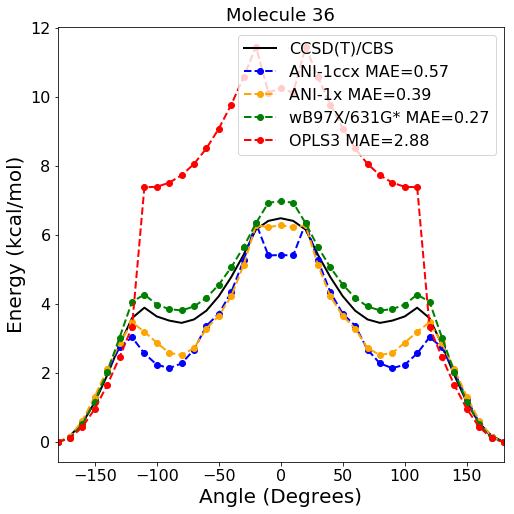

37 ANI-1ccx_2 0.19955972471839195
37 ANI-1x 0.3638186366795889
37 WB97X-631Gd 0.2977401509436143
37 MacroModel_OPLS3 0.5011485832900225


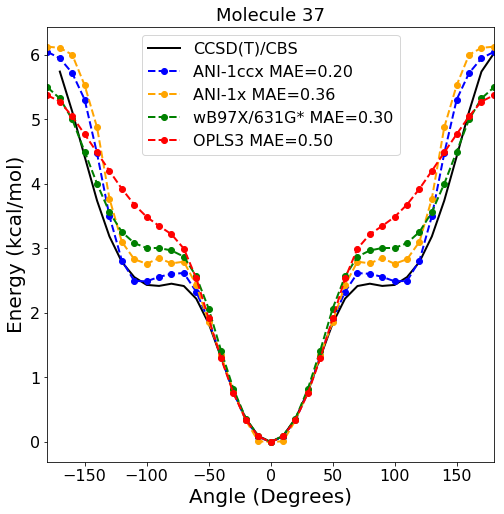

39 ANI-1ccx_2 0.16693970292885427
39 ANI-1x 0.5573957427421898
39 WB97X-631Gd 0.29609628505973495
39 MacroModel_OPLS3 1.3655865044151179


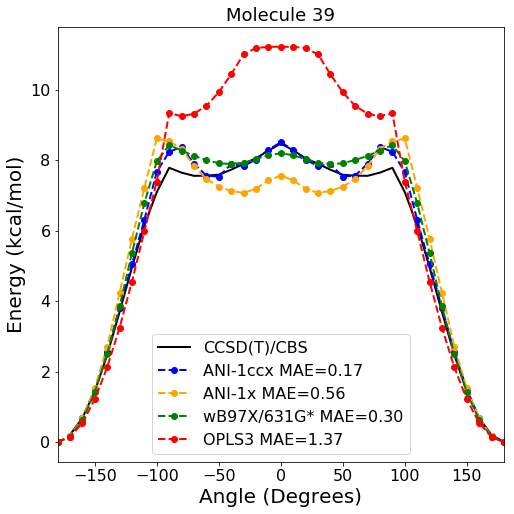

40 ANI-1ccx_2 0.49389718562345153
40 ANI-1x 0.7169071473046223
40 WB97X-631Gd 0.32414688410955517
40 MacroModel_OPLS3 0.8355071548056017


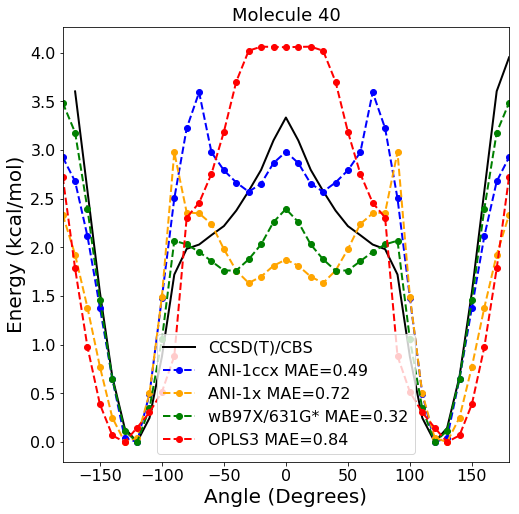

41 ANI-1ccx_2 0.14633504917580276
41 ANI-1x 0.4731373650137755
41 WB97X-631Gd 0.5115344217435981
41 MacroModel_OPLS3 0.9050582502843613


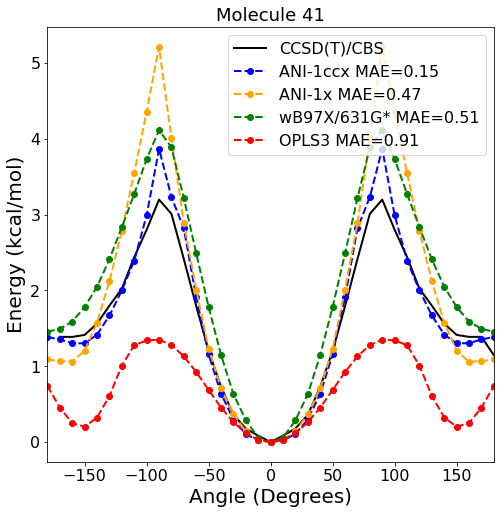

43 ANI-1ccx_2 0.18569895886596785
43 ANI-1x 0.33727196423655414
43 WB97X-631Gd 0.11391263185310496
43 MacroModel_OPLS3 0.26701556003586674


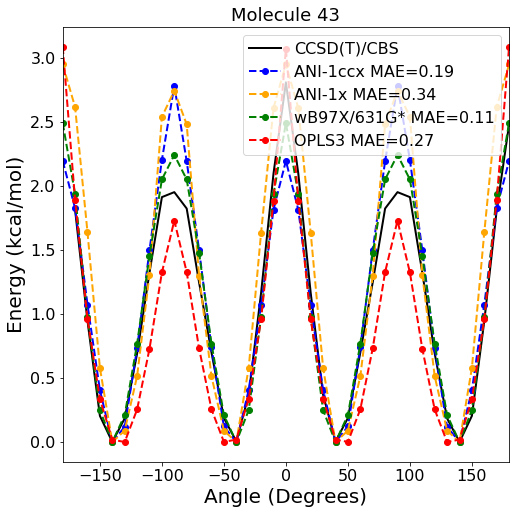

44 ANI-1ccx_2 0.2221579047858993
44 ANI-1x 0.25613096115574624
44 WB97X-631Gd 0.32122032802751393
44 MacroModel_OPLS3 0.5341644430835971


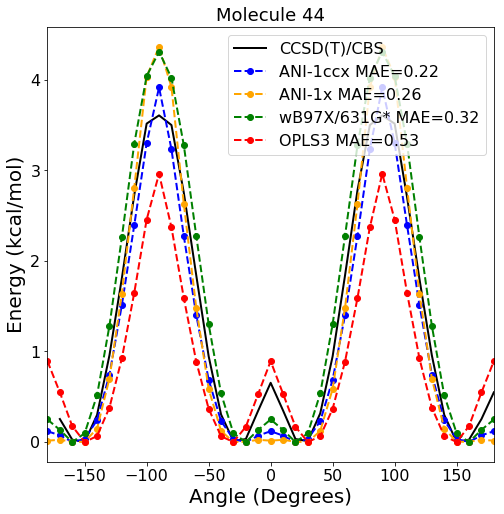

45 ANI-1ccx_2 0.16977728023904662
45 ANI-1x 1.0613896999779548
45 WB97X-631Gd 0.7096706893962458
45 MacroModel_OPLS3 0.6561342236149564


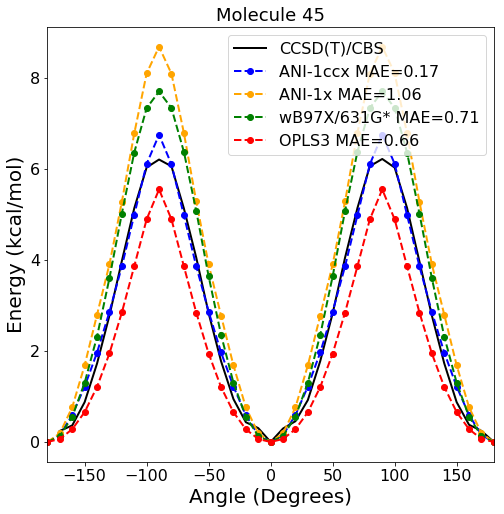

46 ANI-1ccx_2 0.24811257551079724
46 ANI-1x 0.8624713915334837
46 WB97X-631Gd 0.9757927714828702
46 MacroModel_OPLS3 0.40257631724349574


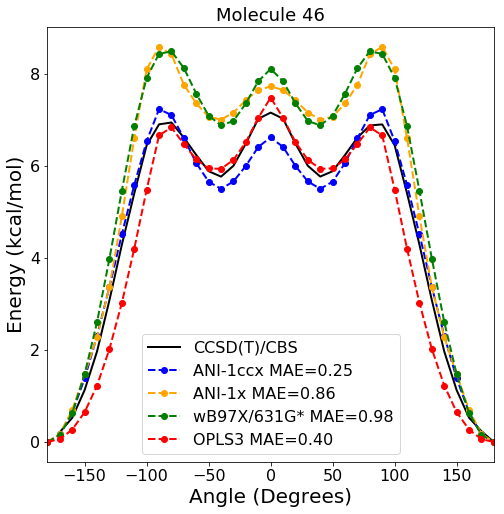

49 ANI-1ccx_2 0.34727525024651185
49 ANI-1x 0.5627274354495098
49 WB97X-631Gd 0.2021941212470813
49 MacroModel_OPLS3 0.55998803096836


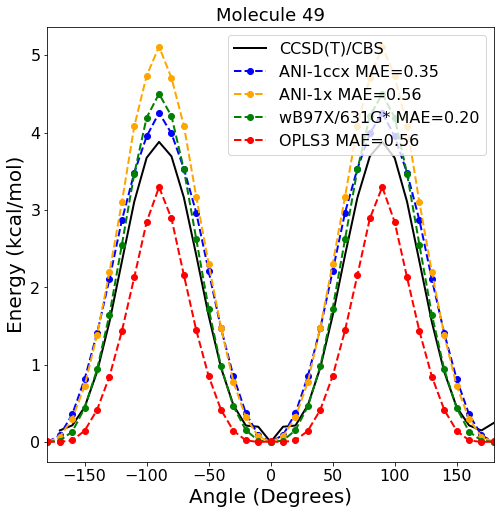

50 ANI-1ccx_2 0.1586706794382331
50 ANI-1x 0.5706366066753684
50 WB97X-631Gd 0.4709471294813459
50 MacroModel_OPLS3 0.33563065501916434


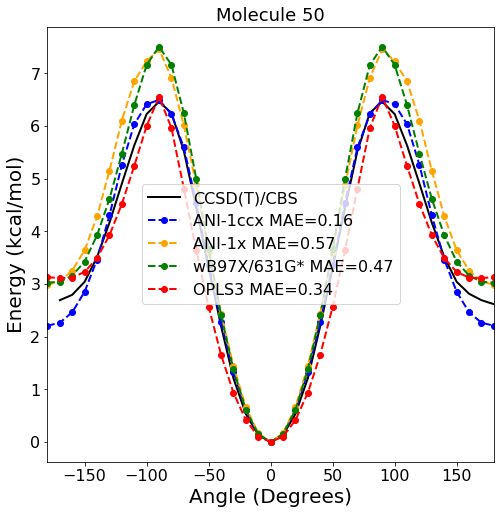

53 ANI-1ccx_2 0.09934935981284011
53 ANI-1x 0.6346316526169156
53 WB97X-631Gd 0.367428847658434
53 MacroModel_OPLS3 0.9777908230831984


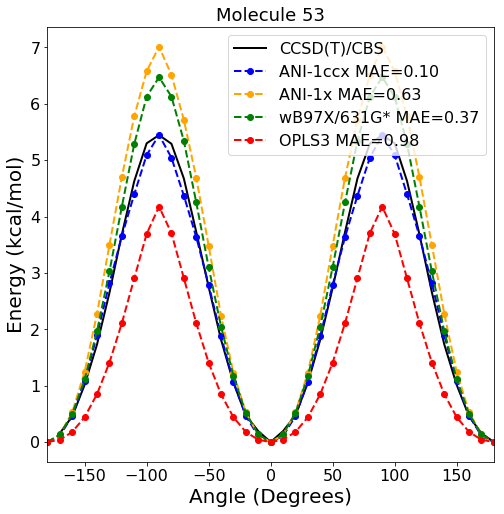

54 ANI-1ccx_2 0.21097849376118066
54 ANI-1x 0.5790001667793275
54 WB97X-631Gd 0.5797322116022465
54 MacroModel_OPLS3 1.0017723706199757


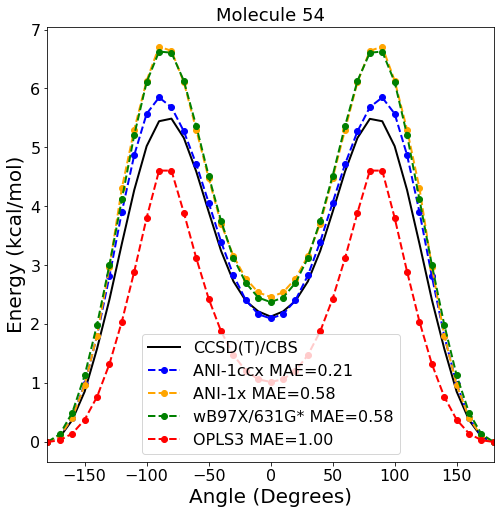

57 ANI-1ccx_2 0.21631175661648686
57 ANI-1x 0.10170530940588665
57 WB97X-631Gd 0.08553390945428652
57 MacroModel_OPLS3 0.532612874913578


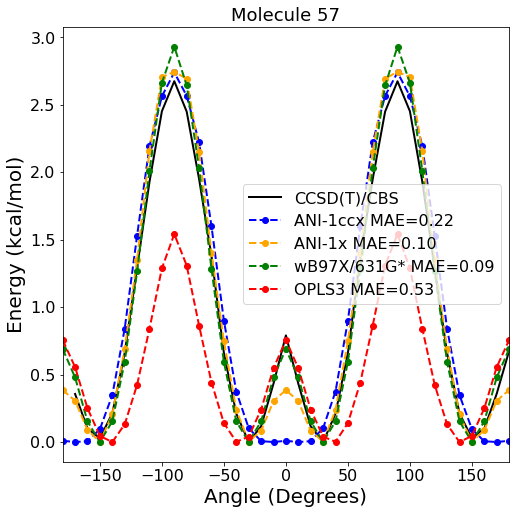

58 ANI-1ccx_2 0.44301476208339846
58 ANI-1x 0.9253530207845196
58 WB97X-631Gd 0.3812336304975864
58 MacroModel_OPLS3 0.6112908382844645


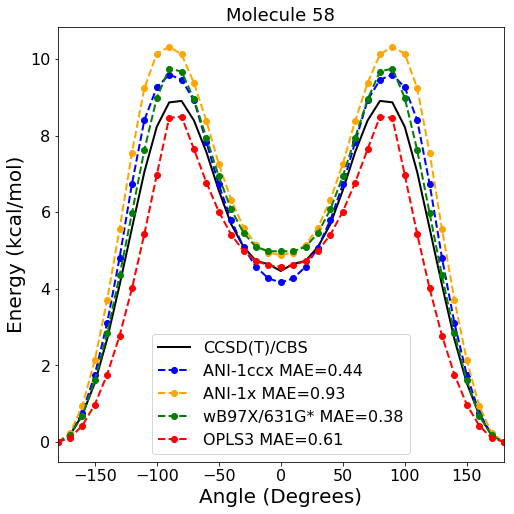

59 ANI-1ccx_2 0.07733424809766845
59 ANI-1x 0.30143021113766943
59 WB97X-631Gd 0.23166223675813397
59 MacroModel_OPLS3 0.7728058334686212


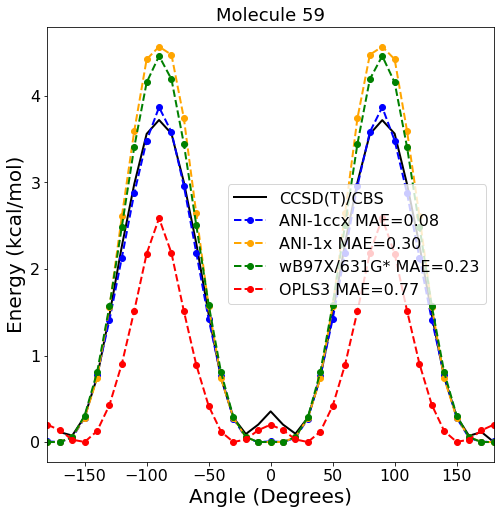

60 ANI-1ccx_2 0.3338489835858211
60 ANI-1x 1.1155622072356008
60 WB97X-631Gd 0.759365051764101
60 MacroModel_OPLS3 0.7572604052669196


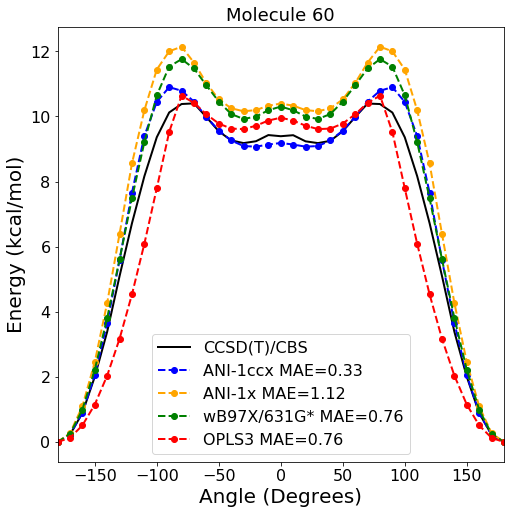

61 ANI-1ccx_2 0.253669059708986
61 ANI-1x 0.35353583280403206
61 WB97X-631Gd 0.28033208768288387
61 MacroModel_OPLS3 0.2831414377523338


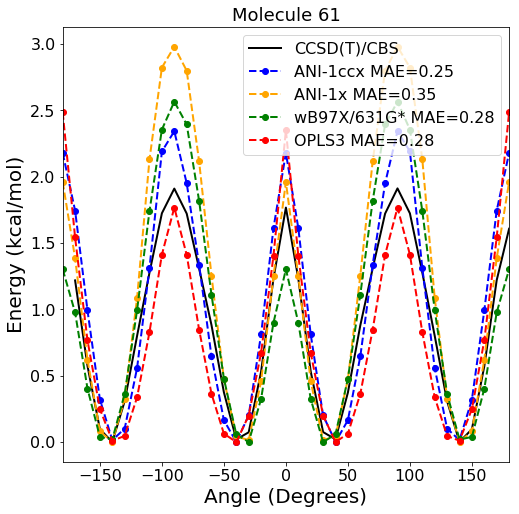

62 ANI-1ccx_2 1.0747212990066515
62 ANI-1x 0.32339371635352104
62 WB97X-631Gd 0.8353869999409654
62 MacroModel_OPLS3 1.0981624978088038


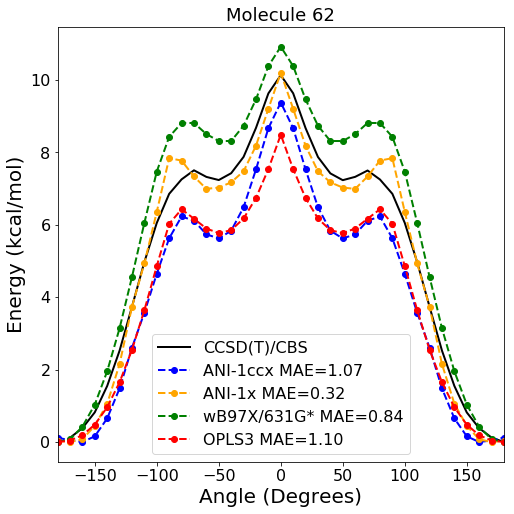

In [8]:
#keylist = {"ANI-1ccx_2":"ANI-1ccx","ANI-1x":"ANI-1x","WB97X-631Gd":"wB97X/631G*"}#,"MP2_OPT_WB97X_SP"]
keylist = {"ANI-1ccx_2":"ANI-1ccx","ANI-1x":"ANI-1x","WB97X-631Gd":"wB97X/631G*","MacroModel_OPLS3":"OPLS3"}#,"MP2_OPT_WB97X_SP"]
for i,key in enumerate(Est.keys()):
    fig = plt.subplots(figsize=[8,8])
    gs  = gridspec.GridSpec(1,1, width_ratios=[1.0])
    #print('Working on:',i)
    ax = plt.subplot(gs[0])
    ax.plot(Est[key]["CCSD(T)ext_CBS_MP2"][:,2],Est[key]["CCSD(T)ext_CBS_MP2"][:,1],'-',label="CCSD(T)/CBS",linewidth=2,c="black")
    
    #color=['red','blue','orange']
    color=['blue','orange','green','red']
    for mkey,c in zip(keylist.keys(),color):
        mae = hdt.calculatemeanabserror(Est[key]["CCSD(T)ext_CBS_MP2"][:,1],Est[key][mkey][:,1])
        print(key,mkey,mae)
        ax.plot(np.concatenate([-Est[key][mkey][-1:,2],Est[key][mkey][:,2]]),
                np.concatenate([Est[key][mkey][-1:,1],Est[key][mkey][:,1]]),'--o',label=keylist[mkey]+' MAE='+format(mae, '.2f'),linewidth=2,c=c)
    ax.set_title('Molecule '+key, fontsize=18)
    ax.legend(fontsize=16)
    matplotlib.rc('xtick', labelsize=16) 
    matplotlib.rc('ytick', labelsize=16)
    ax.set_xlim([-180,180])
    ax.set_xlabel("Angle (Degrees)", fontsize=20)
    ax.set_ylabel("Energy (kcal/mol)", fontsize=20)
    plt.show()

In [9]:
for k in MAE.keys():
    print(k,np.median(MAE[k]))

ANI-1ccx-R 0.32997446831674704
ANI-1x 0.4673453194162446
CCSD(T)ext_CBS_MP2 0.056792105098470706
MP2 0.5362222222222223
MP2X_MP2 0.1318888888888889
MP2_CBS_MP2 0.10816666666666662
MacroModel_OPLS2005 0.6552222222222223
MacroModel_OPLS3 0.6319722222222223
WB97X-631Gd 0.32107151277777773
b3lyp_opt_psi4_energies 0.3100277777777778
b3lypd3_opt_psi4_energies 0.24411111111111106
ANI-1ccx_2 0.23049868244301377


In [10]:
labels = []
data_to_plot = []
maea = []
for k in MAE.keys():
    labels.append(k)
    data_to_plot.append(MAE[k])
    maea.append(np.median(MAE[k]))

In [11]:
idx = np.argsort(maea)
labels = np.array(labels)[idx]
data_to_plot = np.array(data_to_plot)[idx]
print(labels)
print(data_to_plot.shape)

['CCSD(T)ext_CBS_MP2' 'MP2_CBS_MP2' 'MP2X_MP2' 'ANI-1ccx_2'
 'b3lypd3_opt_psi4_energies' 'b3lyp_opt_psi4_energies' 'WB97X-631Gd'
 'ANI-1ccx-R' 'ANI-1x' 'MP2' 'MacroModel_OPLS3' 'MacroModel_OPLS2005']
(12, 45)


In [12]:
label_map = {'CCSD(T)ext_CBS_MP2' :'CCSD(T)*/CBS',
             'MacroModel_OPLS3'   :'OPLS3',
             'MacroModel_OPLS2005':'OPLS2005',
             'MOE_AMBER12_EHT_VACUUM':'AMBER12',
             'SZYBKI_MMFF94s':'MMFF94',
             'MP2_OPT_WB97X_SP':r'$\omega$B97X',
             'WB97X-631Gd':r'$\omega$B97X/6-31G*',
             'b3lyp_opt_psi4_energies':'B3LYP',
             'b3lypd3_opt_psi4_energies':'B3LYP-D3',
             'hf_opt_psi4_energies':'HF',
             'MP2_CBS_MP2':'MP2/CBS',
             'MP2X_MP2':'MP2X',
             'MP2':'MP2/6-311+G**',
             'ANI-1x':'ANI-1x',
             'ANI-1ccx_2':'ANI-1ccx',
             }

for i,l in enumerate(labels):
    if l in label_map:
        labels[i]=label_map[l]

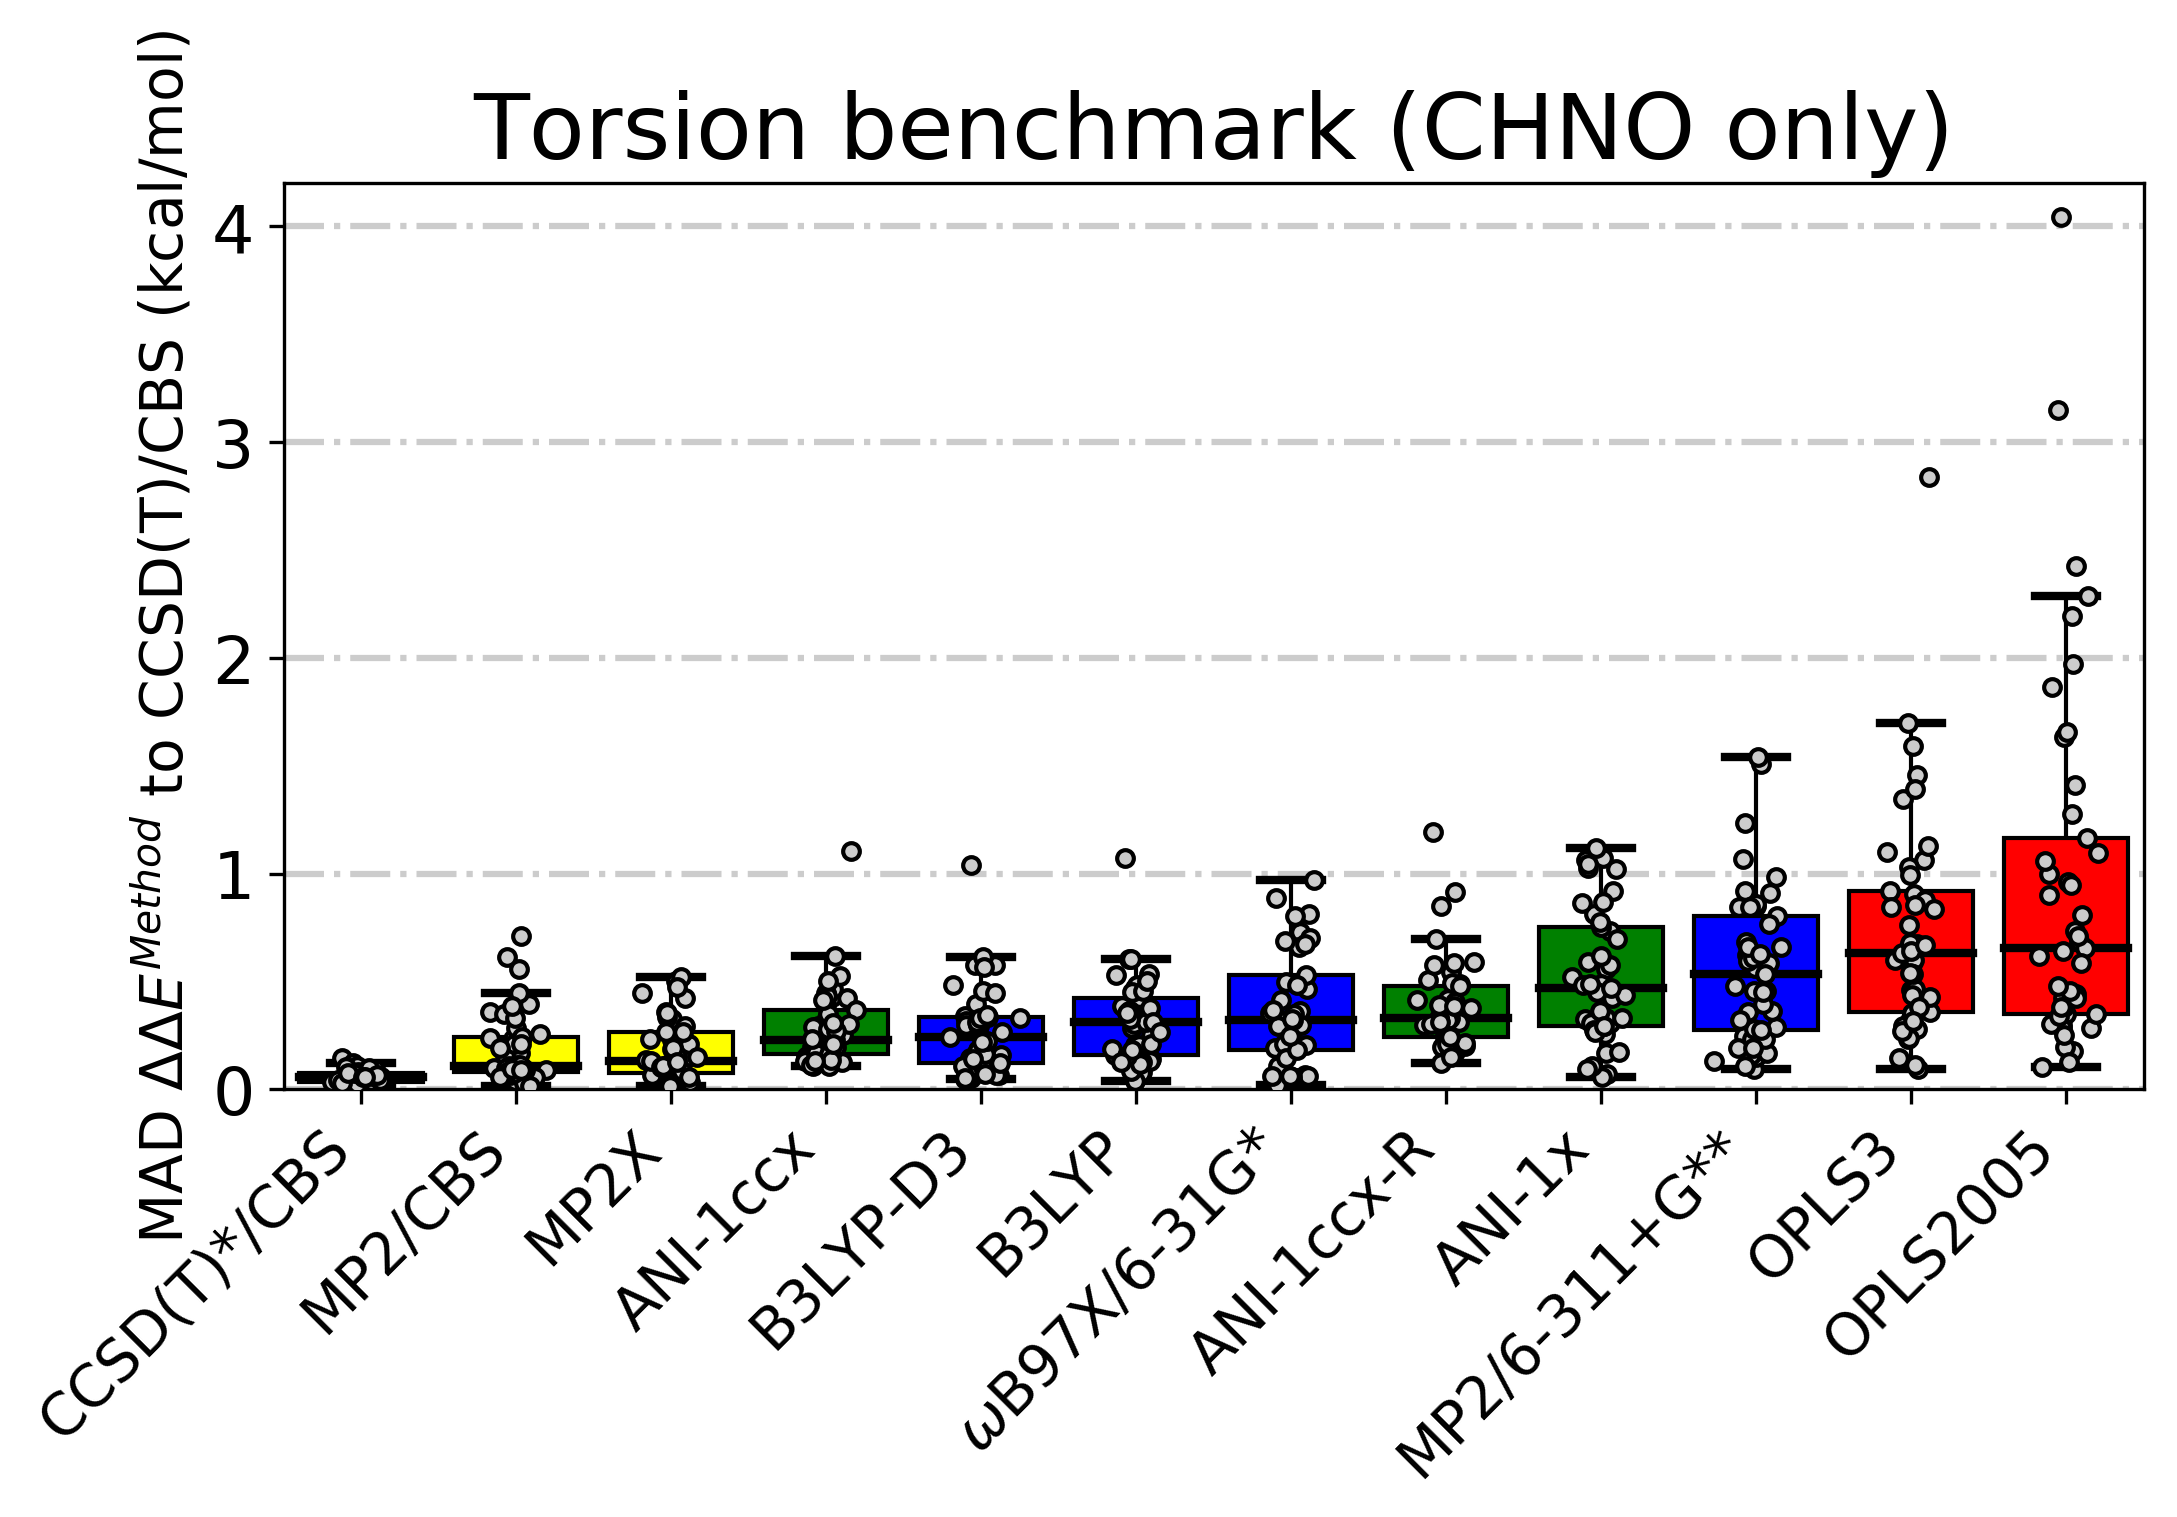

In [13]:
## combine these different collections into a list    
data_to_plot = np.stack(data_to_plot).T     ### I used four sets of data but is should work for any number
# Create a figure instance
fig = plt.figure(1, figsize=(8, 4),dpi=300)
# Create an axes instance
ax = fig.add_subplot(111)


bp = ax.boxplot(data_to_plot, patch_artist=True, widths=0.8)
## change outline color, fill color and linewidth of the boxes
for i,box in enumerate(bp['boxes']):
#     box.set( color='black', linewidth=1)
#    box.set( facecolor = 'green', alpha=1.0 )   

    if i == 3 or i==7 or i == 8:
        box.set( color='black', linewidth=1)
        box.set( facecolor = 'green', alpha=1.0 ) 
    elif i == 10 or i == 11: 
        box.set( color='black', linewidth=1)
        box.set( facecolor = 'red', alpha=1.0 ) 
    elif i == 0 or i == 1 or i == 2: 
        box.set( color='black', linewidth=1)
        box.set( facecolor = 'yellow', alpha=1.0 )
    else: 
        box.set( color='black', linewidth=1)
        box.set( facecolor = 'blue', alpha=1.0 )

#     if i == 6:
#         box.set( color='black', linewidth=1)
#         box.set( facecolor = 'orange', alpha=1.0 ) 
#     elif i == 1 or i == 2: 
#         box.set( color='black', linewidth=1)
#         box.set( facecolor = 'blue', alpha=1.0 ) 
#     elif i == 0 or i == 3: 
#         box.set( color='black', linewidth=1)
#         box.set( facecolor = 'red', alpha=1.0 ) 
#     else: 
#         box.set( color='black', linewidth=1)
#         box.set( facecolor = 'green', alpha=1.0 )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='k', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='k', linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(labels, rotation=45, ha='right',fontsize=14)

for i in range(len(data_to_plot.T)):
    y = data_to_plot.T[i]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+1, 0.075, size=len(y))
    plt.plot(x, y, 'o',c='k',mfc=[0.8,0.8,0.8],ms=4, alpha=1,zorder=1000,linewidth=0.1)

for yval in [0,1,2,3,4]:
    plt.axhline(yval,c=[0.8,0.8,0.8],ls='-.',zorder=-1)

#plt.xticks(rotation=45)

plt.ylabel(r'MAD $\Delta\Delta E^{Method}$ to CCSD(T)/CBS (kcal/mol)',fontsize=14)
plt.title('Torsion benchmark (CHNO only)',fontsize=22)
plt.ylim(0,4.2)
#plt.ylim(0,2.0)

# ax.annotate('This work', xy=(4.2, 0.6), xytext=(5.0, 2.5), fontsize=16,
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

#ax.annotate('Transfer learning \n based model', xy=(4.2, 0.6), xytext=(5.0, 2.5), fontsize=16,
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

plt.show()
#fig.savefig('fig1.png', bbox_inches='tight')

In [14]:
comp_list = ["ANI-1x-DFTDZ-DHL","ANI-1x-CCSDT-DHL",]
targ_list = ["CCSD(T)ext_CBS_MP2","MP2_OPT_WB97X_SP"]
errors = []
for i,key in enumerate(Est.keys()):
    print(key)
    err = np.empty(len(comp_list)*len(targ_list),dtype=np.float64)
    for j,ckey in enumerate(comp_list):
        for k,tkey in enumerate(targ_list):
            print(ckey+'->'+tkey+':',hdt.calculatemeanabserror(Est[key][ckey][:,1],Est[key][tkey][:,1]))
            err[2*j+k] = hdt.calculatemeanabserror(Est[key][ckey][:,1],Est[key][tkey][:,1])
    errors.append(err)
names = []
for j,ckey in enumerate(comp_list):
    for k,tkey in enumerate(targ_list):
        names.append(ckey+'->'+tkey)
errors=np.stack(errors)

01


KeyError: 'ANI-1x-DFTDZ-DHL'

In [ ]:
print(names)
print(np.median(errors,axis=0))

In [ ]:
## combine these different collections into a list    
data_to_plot = np.stack(errors).T     ### I used four sets of data but is should work for any number
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6),dpi=200)
# Create an axes instance
ax = fig.add_subplot(111)


bp = ax.boxplot(errors, patch_artist=True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='g', linewidth=2)
    # change fill color
    box.set( facecolor = 'g', alpha=0.5 )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=2)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='k', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='k', linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(names)

for i in range(len(errors.T)):
    y = errors.T[i]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+1, 0.02, size=len(y))
    plt.plot(x, y, 'o',c='k',mfc=[0.8,0.8,0.8],ms=5, alpha=1,zorder=1000)

for yval in [0,1,2,3,4]:
    plt.axhline(yval,c=[0.8,0.8,0.8],ls='-.',zorder=-1)

plt.xticks(rotation=90)

plt.ylabel('MAE (kcal/mol)')
plt.title('Dihedral scan - level of theory comparison (CHNO)')
plt.ylim(0,4.2)
plt.show()